In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [8]:
from google.colab import files
import pandas as pd

# Upload your CSV file
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows of the DataFrame
df.head()

Saving Churn_Modelling.csv to Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-c9998cbe8101>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

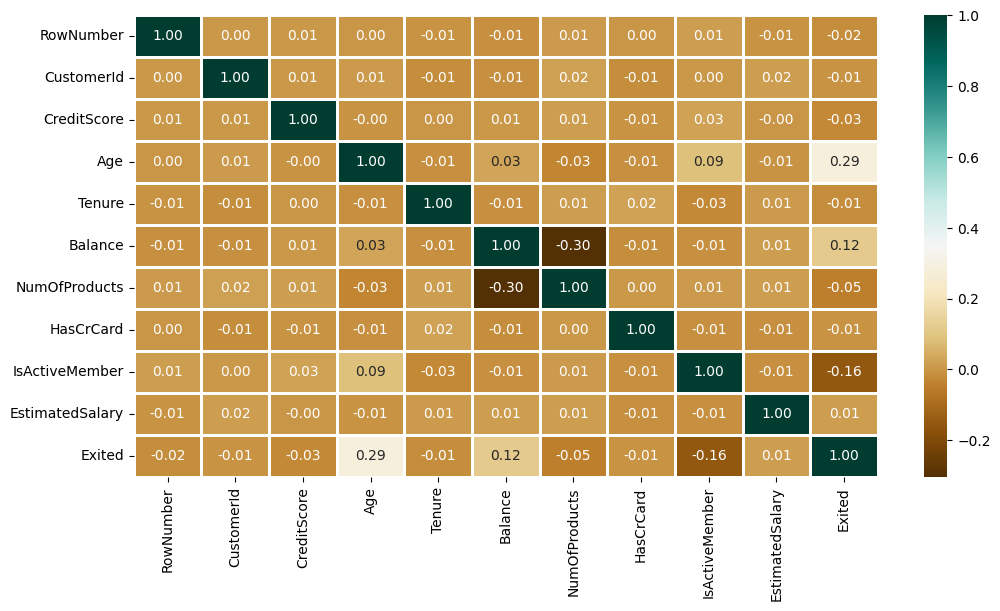

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),
           cmap='BrBG',
           fmt= '.2f',
           linewidths=2,
           annot=True)

<ipython-input-14-d3c4e9dde0f8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)


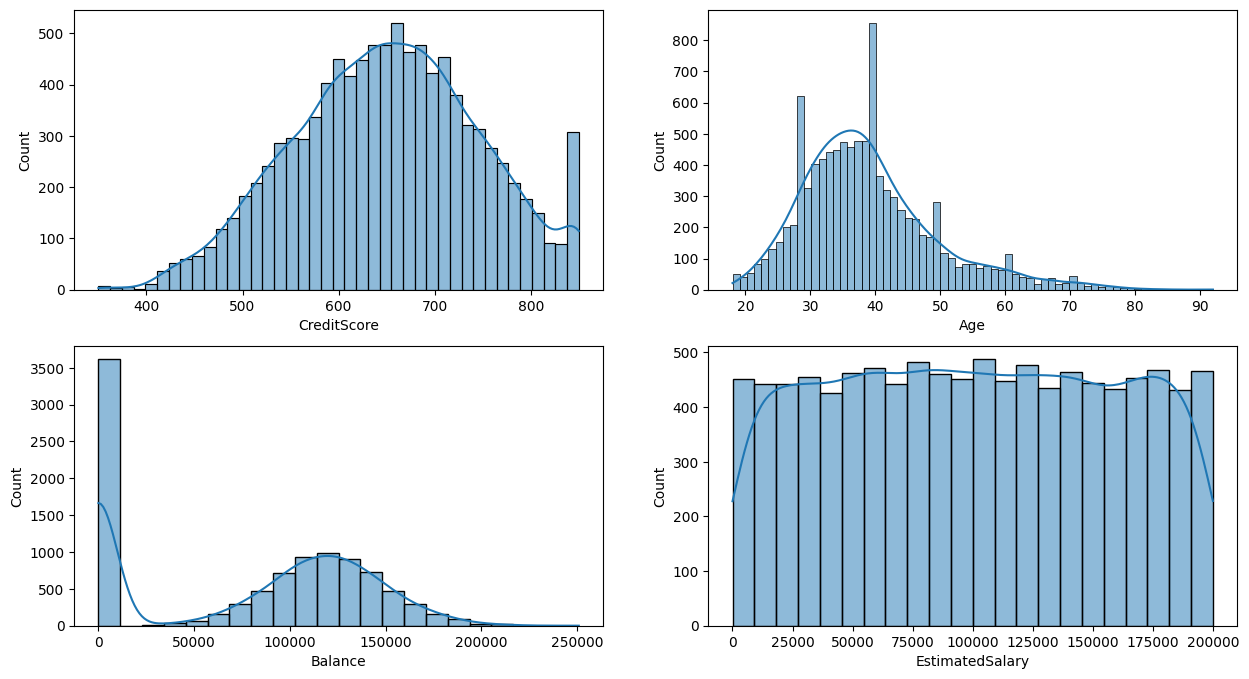

In [14]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1
#sns.histplot(df["flipper_length_mm"], kde=True)
for i in lis:
    plt.subplot(2, 2, index)
    #sns.distplot(df[i])
    sns.histplot(df[i], kde=True)
    index += 1

<ipython-input-15-4b5c527ee229>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, index)


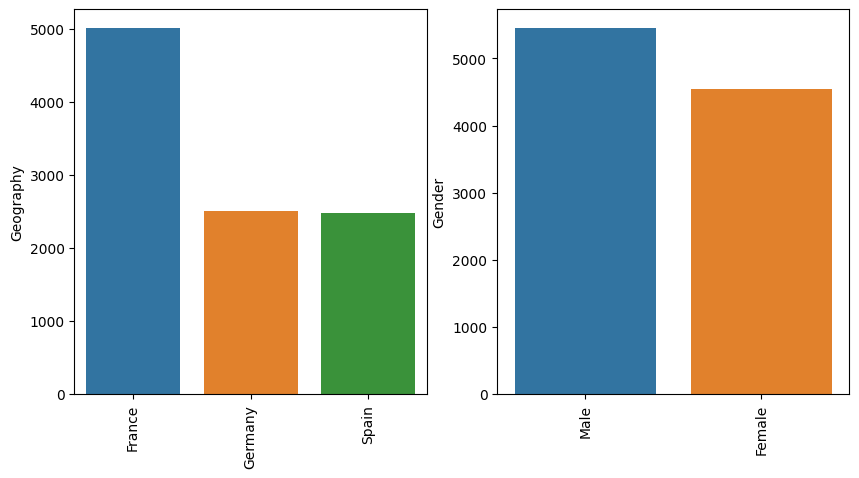

In [15]:
lis2 = ['Geography', 'Gender']
plt.subplots(figsize=(10, 5))
index = 1

for col in lis2:
    y = df[col].value_counts()
    plt.subplot(1, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [16]:
df["Geography"].fillna(df["Geography"].mode()[0],inplace = True)
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
le = LabelEncoder()
df['Geography']= le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [19]:
x = df.iloc[:,3:13].values
y = df.iloc[:,13:14].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test, y_pred))
    print("Classification report of", clf.__class__.__name__, ":\n", classification_report(y_test, y_pred))

<ipython-input-22-e763996e7ad8>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  RandomForestClassifier = 84.5
Classification report of RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1595
           1       0.65      0.52      0.58       405

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy score of  KNeighborsClassifier = 82.45
Classification report of KNeighborsClassifier :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1595
           1       0.59      0.45      0.51       405

    accuracy                           0.82      2000
   macro avg       0.73      0.69      0.70      2000
weighted avg       0.81      0.82      0.82      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 86.15
Classification report of SVC :
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.85      0.39      0.53       405

    accuracy                           0.86      2000
   macro avg       0.86      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000

Accuracy score of  LogisticRegression = 80.75
Classification report of LogisticRegression :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.59      0.16      0.25       405

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.77      0.81      0.76      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
